In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_auc_score, roc_curve, accuracy_score
from matplotlib.colors import ListedColormap
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import RandomOverSampler


In [3]:
df = pd.read_csv(r"C:\Users\jenar\Downloads\seattle-weather(in).csv")
df.head(10)

,date,precipitation,temp_max,temp_min,wind,weather
0,1/1/2012,0.0,12.8,5.0,4.7,drizzle
1,1/2/2012,10.9,10.6,2.8,4.5,rain
2,1/3/2012,0.8,11.7,7.2,2.3,rain
3,1/4/2012,20.3,12.2,5.6,4.7,rain
4,1/5/2012,1.3,8.9,2.8,6.1,rain
5,1/6/2012,2.5,4.4,2.2,2.2,rain
6,1/7/2012,0.0,7.2,2.8,2.3,rain
7,1/8/2012,0.0,10.0,2.8,2.0,sun
8,1/9/2012,4.3,9.4,5.0,3.4,rain
9,1/10/2012,1.0,6.1,0.6,3.4,rain


In [4]:
df = df.drop("date", axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   precipitation  1461 non-null   float64
 1   temp_max       1461 non-null   float64
 2   temp_min       1461 non-null   float64
 3   wind           1461 non-null   float64
 4   weather        1461 non-null   object 
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


In [6]:
print(df["weather"].value_counts())

weather
rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: count, dtype: int64


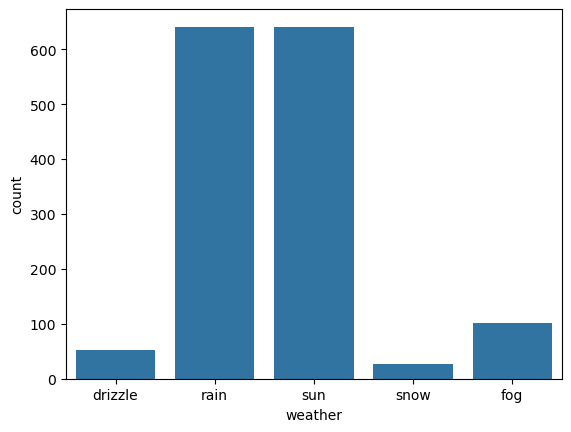

In [7]:
sns.countplot(x='weather', data=df)
plt.show()

In [8]:
df_int = df
df_int['weather_int'] = df_int['weather']
df_int.weather_int = df_int.weather_int.map({'drizzle':0, 'rain':1, 'sun':2, 'snow':3, 'fog':4})
df = df.drop("weather", axis=1)
df.head(10)

,precipitation,temp_max,temp_min,wind,weather_int
0,0.0,12.8,5.0,4.7,0
1,10.9,10.6,2.8,4.5,1
2,0.8,11.7,7.2,2.3,1
3,20.3,12.2,5.6,4.7,1
4,1.3,8.9,2.8,6.1,1
5,2.5,4.4,2.2,2.2,1
6,0.0,7.2,2.8,2.3,1
7,0.0,10.0,2.8,2.0,2
8,4.3,9.4,5.0,3.4,1
9,1.0,6.1,0.6,3.4,1


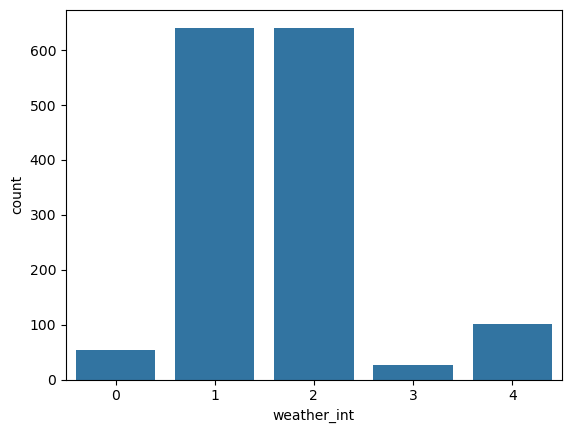

In [11]:
sns.countplot(x='weather_int', data=df)
plt.show()

In [12]:
X = df[['precipitation','temp_max','temp_min','wind']]
y = df[['weather_int']]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)
print(np.shape(X_train))
print(np.shape(X_test))

(1022, 4)
(439, 4)


In [13]:
ros = RandomOverSampler(random_state=42)
X_train_balanced, y_train_balanced = ros.fit_resample(X_train, y_train)

In [15]:
knn = KNeighborsClassifier()
param_grid = {"n_neighbors": [3,5,7,9,11,13,25], "weights": ["uniform", "distance"], "p": [1,2], "algorithm":["auto", "ball_tree", "kd_tree", "brute"]}
grid_search_rf = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search_rf.fit(X_train_balanced, y_train_balanced)

c:\Users\jenar\miniconda3\envs\tc2004b\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


,estimator,KNeighborsClassifier()
,param_grid,"{'algorithm': ['auto', 'ball_tree', ...], 'n_neighbors': [3, 5, ...], 'p': [1, 2], 'weights': ['uniform', 'distance']}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,3


In [19]:
best_rf = grid_search_rf.best_estimator_
print("Best Hyperparameters for Random Forest:", grid_search_rf.best_params_)
y_pred_rf = best_rf.predict(X_test)
print("Predictions: ", y_pred_rf)
print("Actual: ", np.reshape(y_test,(1,439)))

Best Hyperparameters for Random Forest: {'algorithm': 'brute', 'n_neighbors': 3, 'p': 2, 'weights': 'distance'}
Predictions:  [0 1 1 0 1 1 2 4 1 0 2 4 1 0 0 1 2 1 2 2 1 2 1 2 2 1 2 2 2 4 1 4 4 3 2 1 1
 1 1 2 1 2 4 2 2 1 1 4 4 2 2 1 2 1 2 1 1 2 1 2 1 2 4 2 2 0 1 2 1 1 1 2 2 2
 1 1 2 0 1 2 1 2 1 1 1 2 1 1 2 1 1 2 2 1 1 2 1 2 2 1 2 2 3 3 1 2 2 1 4 1 1
 1 1 1 2 0 2 1 2 1 1 1 1 3 1 2 2 2 2 2 2 2 4 0 0 2 1 1 1 2 2 4 1 1 2 4 2 1
 2 2 4 4 4 2 1 1 4 4 2 1 4 2 1 2 2 1 1 4 2 4 1 1 4 2 1 1 0 1 0 1 1 1 2 1 1
 1 1 1 2 2 2 2 2 1 2 2 1 1 2 1 0 2 0 1 4 4 1 2 3 2 1 2 2 2 2 2 4 2 2 2 3 2
 2 2 4 1 2 1 2 1 2 1 2 0 1 2 2 1 2 4 1 1 2 3 2 2 2 2 3 1 1 1 1 1 2 4 1 4 1
 1 1 2 2 1 2 4 3 4 2 2 4 4 2 1 2 2 1 1 2 0 2 1 2 0 4 2 1 2 2 1 4 1 2 2 1 1
 4 1 1 2 1 1 1 2 1 1 3 4 2 2 1 1 1 4 1 0 2 1 2 4 1 1 1 2 2 1 3 2 4 1 2 1 1
 2 2 0 2 1 1 1 1 0 1 1 1 1 2 4 1 1 0 2 0 4 4 1 2 4 2 2 2 2 0 1 1 1 4 0 2 4
 1 1 1 2 3 4 1 1 1 1 1 4 0 2 2 1 4 2 0 1 1 2 2 2 1 2 2 4 2 0 1 0 4 2 2 1 2
 2 1 2 2 2 4 4 2 2 1 1 2 2 2 4 4 4 2 1 4 0 1 2 1 

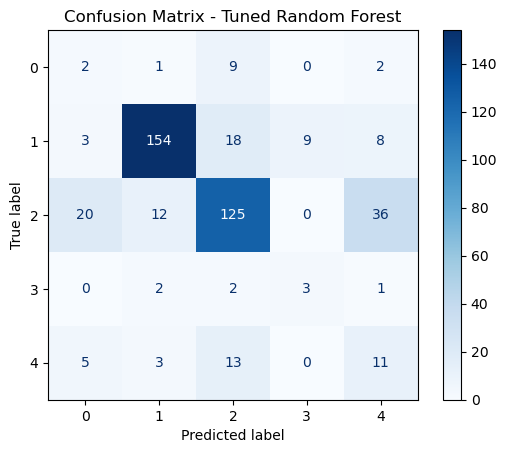

In [20]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=best_rf.classes_)
disp_rf.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Tuned Random Forest")
plt.show()

In [ ]:
report_rf = classification_report(y_test, y_pred_rf)
print("Classification Report for Random Forest:\n", report_rf)

Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.07      0.14      0.09        14
           1       0.90      0.80      0.85       192
           2       0.75      0.65      0.69       193
           3       0.25      0.38      0.30         8
           4       0.19      0.34      0.24        32

    accuracy                           0.67       439
   macro avg       0.43      0.46      0.44       439
weighted avg       0.74      0.67      0.70       439

